In [1]:
import numpy as np #匯入numpy模組，NumPy是Python語言的擴充程式庫。支援維度陣列與矩陣運算
import pandas as pd 

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
import matplotlib.pyplot as plt

In [70]:
# Loading dataset
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data() # (60000, 28, 28), (60000, )

In [71]:
x_train_image = x_train_image[:1000]/255
x_test_image = x_test_image/255
y_train_label = y_train_label[:1000]

In [6]:
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

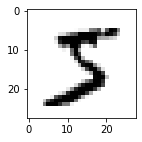

In [7]:
plot_image(x_train_image[0])

In [73]:
# Training Phase
U, S, V = [], [], [] # init

# for each digit from 0~9
for i in range(10):
    # Stacking all the columns of each image of the digit i: (n_i, 28, 28) -> (n_i, 28*28), where n_i is the #of training digit i 
    imat = x_train_image[y_train_label==i].reshape((-1, 28*28)).T
    # Applying the SVD to matrix representation of digit i
    Ui, si, Vi = np.linalg.svd(imat)
    # Appending the left singular matrix to U
    U.append(Ui)
    S.append(si)
    V.append(Vi)


In [122]:
def acc(results):
    n = len(results)
    return sum(results == y_test_label[:n])/n

In [150]:
def confusion_matrix(results):
    n = len(results)
    cm = np.zeros((10, 10))
    for (clas, ans) in zip(results, y_test_label[:n]):
        cm[clas][ans] += 1
    return cm.astype(int)

In [208]:
def cm_fig(results):
    plt.matshow(confusion_matrix(results), cmap="Reds")

In [167]:
def Uk(k):
    return [np.dot(U[i][:k].T, U[i][:k]) for i in range(10)]

In [89]:
def classification(img_num, Uk=Uk(10), plot=True):
    if plot:
        plot_image(x_test_image[img_num])
    z = x_test_image[img_num].reshape(-1)
    residual = [np.linalg.norm(np.dot( (np.identity(784) - Uk[i]), z )) for i in range(10)]
    result = np.argmin(residual)
#     print("The classify result is: {}".format(result))
    return result

# print("The correct answer is: {}".format(y_test_label[img_num]))

In [92]:
U15 = Uk(15)
allr = [classification(i, Uk=U15, plot=False) for i in range(10000)]

In [93]:
U10 = Uk(10)
U15 = Uk(15)
U20 = Uk(20)

In [152]:
acc(allr)

0.8229

In [210]:
confusion_matrix(allr)

array([[ 939,    0,   14,   22,    0,   55,   54,    4,   45,   16],
       [   0, 1104,   71,    2,   11,    2,    2,   40,    5,    8],
       [  11,    4,  848,   37,    4,    9,   68,   32,   45,   11],
       [   0,    0,   11,  861,    0,  137,    0,   17,   36,   10],
       [   5,    0,   16,    1,  820,   14,   46,   15,   14,  114],
       [   9,    4,    4,   40,    1,  549,   21,    2,   20,    2],
       [   9,    1,    8,    3,   17,   36,  764,    0,   17,    2],
       [   1,    0,   10,   10,    1,    7,    1,  795,    9,   20],
       [   2,   22,   47,   21,    7,   51,    2,   29,  738,   15],
       [   4,    0,    3,   13,  121,   32,    0,   94,   45,  811]])

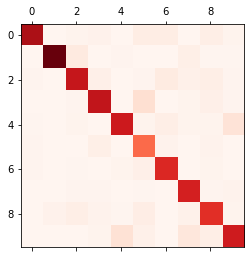

In [209]:
cm_fig(allr)

In [237]:
def classify_n_data(n, k, training_size=""):
    rl = []
    _Uk = Uk(k)
    if training_size=="l":
        print("l")
        _Uk = Ukl(k)
    elif training_size=="ll":
        print("ll")
        _Uk = Ukll(k)
    for i in range(n):
        rl.append(classification(i, Uk=_Uk, plot=False))
        if (i/n*100)%10 == 0:
            print(round(i/n*100), end=" ")
    print(100)
            
    return rl

In [216]:
allr10 = classify_n_data(1000, 10)
allr15 = classify_n_data(1000, 15)
allr20 = classify_n_data(1000, 20)

0 10 20 30 40 50 60 70 80 90 0 10 20 30 40 50 60 70 80 90 0 10 20 30 40 50 60 70 80 90 

In [229]:
allr100 = classify_n_data(10000, 10)
allr150 = classify_n_data(10000, 15)
allr200 = classify_n_data(10000, 20)

0 10 20 30 40 50 60 70 80 90 100


In [230]:
print(acc(allr10))
print(acc(allr15))
print(acc(allr20))
print(acc(allr100))
print(acc(allr150))
print(acc(allr200))

0.721
0.773
0.813
0.764
0.8229
0.8477


In [231]:
confusion_matrix(allr200)

array([[ 943,    0,   12,   23,    0,   48,   46,    3,   32,    8],
       [   0, 1105,   40,    2,    4,    2,    3,   20,    3,    6],
       [  11,    7,  884,   39,    6,    3,   40,   19,   27,    6],
       [   0,    0,    9,  835,    0,   78,    0,    8,   30,   12],
       [   4,    0,   14,    1,  852,    6,   36,   10,   14,   94],
       [   4,    4,    3,   70,    2,  662,   19,    3,   64,    7],
       [  14,    0,    7,    3,   11,   28,  812,    0,   16,    1],
       [   1,    0,   19,    7,    1,    7,    1,  818,   16,   24],
       [   1,   19,   42,   16,    6,   36,    1,   12,  729,   14],
       [   2,    0,    2,   14,  100,   22,    0,  135,   43,  837]])

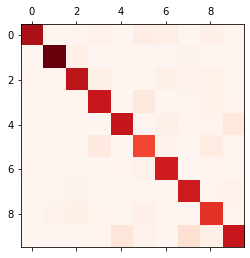

In [232]:
cm_fig(allr200)

In [161]:
print(acc(allr10))
print(acc(allr15))
print(acc(allr20))
print(acc(allr100))
print(acc(allr150))
print(acc(allr200))

0.057
0.092
0.099
0.0508
0.0819
0.088


## larger training set: 500/5000/10000

In [264]:
# larger training set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_image_l = x_train[:500]/255
x_test_image = x_test/255
y_train_label_l = y_train[:500]

# Training Phase
Ul, Sl, Vl = [], [], [] # init

# for each digit from 0~9
for i in range(10):
    # Stacking all the columns of each image of the digit i: (n_i, 28, 28) -> (n_i, 28*28), where n_i is the #of training digit i 
    imat = x_train_image_l[y_train_label_l==i].reshape((-1, 28*28)).T
    # Applying the SVD to matrix representation of digit i
    Ui, si, Vi = np.linalg.svd(imat)
    # Appending the left singular matrix to U
    Ul.append(Ui)
    Sl.append(si)
    Vl.append(Vi)


In [103]:
def Ukl(k):
    return [np.dot(Ul[i][:k].T, Ul[i][:k]) for i in range(10)]

In [280]:
# allr1l = classify_n_data(1000, 1, 'l')
# allr2l = classify_n_data(1000, 2, 'l')
# allr3l = classify_n_data(1000, 3, 'l')
# allr5l = classify_n_data(1000, 5, 'l')
# allr10l = classify_n_data(1000, 10, 'l')
# allr15l = classify_n_data(1000, 15, 'l')
# allr20l = classify_n_data(1000, 20, 'l')
# allr30l = classify_n_data(1000, 30, 'l')
# allr40l = classify_n_data(1000, 40, 'l')
# allr50l = classify_n_data(1000, 50, 'l')
# allr60l = classify_n_data(1000, 60, 'l')
# allr70l = classify_n_data(1000, 70, 'l')
# allr80l = classify_n_data(1000, 80, 'l')
# allr90l = classify_n_data(1000, 90, 'l')
# allr100l = classify_n_data(1000, 100, 'l')

Text(0, 0.5, 'acc')

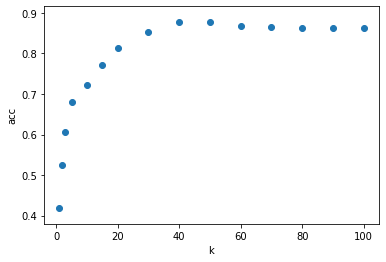

In [279]:
# training size = 500
x = [1, 2, 3, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y = [acc(allr1l), acc(allr2l), acc(allr3l), acc(allr5l), acc(allr10l), acc(allr15l), acc(allr20l), acc(allr30l),
     acc(allr40l), acc(allr50l), acc(allr60l), acc(allr70l), acc(allr80l), acc(allr90l), acc(allr100l)]
plt.scatter(x, y)
plt.xlabel("k")
plt.ylabel("acc")

In [293]:
rrr = [allr1l, allr2l, allr3l, allr5l, allr10l, allr15l, allr20l, allr30l,
     allr40l, allr50l, allr60l, allr70l, allr80l, allr90l, allr100l]

In [312]:
ii = 0

In [328]:
cm_fig(rrr[ii])
ii+=1

IndexError: list index out of range

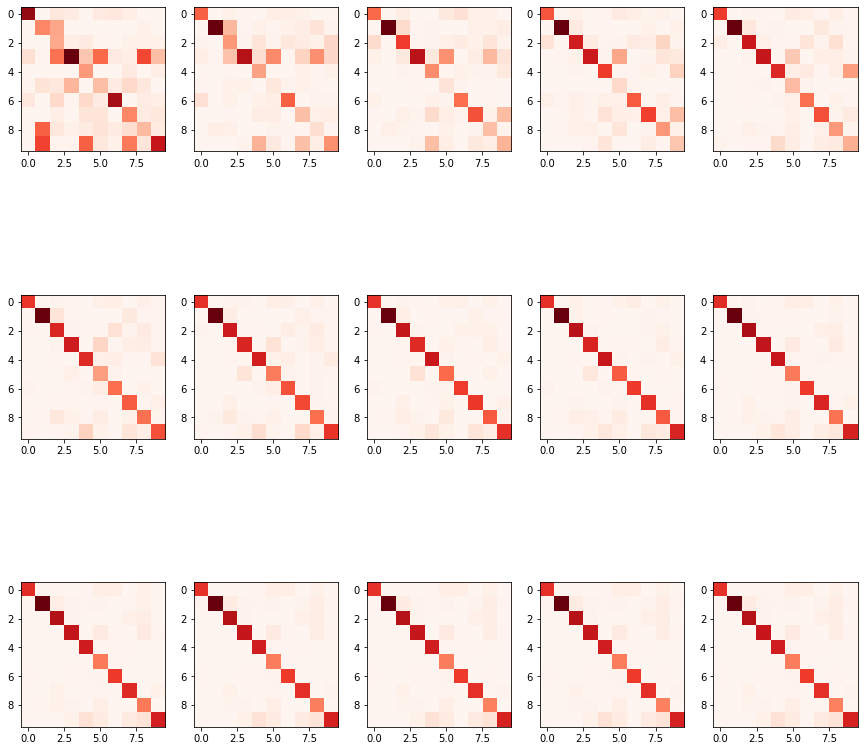

In [301]:
w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 3
for i in range(0, columns*rows):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(confusion_matrix(rrr[i]), cmap="Reds")
plt.show()

In [263]:
# training size = 5000
print(acc(allr10l))
print(acc(allr15l))
print(acc(allr20l))
# print(acc(allr100))
# print(acc(allr150))
# print(acc(allr200))

0.192
0.174
0.169


In [242]:
# training size = 10000
print(acc(allr10l))
print(acc(allr15l))
print(acc(allr20l))
# print(acc(allr100))
# print(acc(allr150))
# print(acc(allr200))

0.057
0.092
0.099


In [258]:
sum(allr10l == y_test_label[:1000])

57

In [250]:
sum(allr10l == y_test_label[:1000])/1000
sum(allr15l == y_test_label[:1000])/1000
sum(allr20l == y_test_label[:1000])/1000
# sum(allr100l == y_test_label[:10000])/10000
# sum(allr150l == y_test_label[:10000])/10000
# sum(allr200l == y_test_label[:10000])/10000

0.099

In [ ]:
# confusion matrix
cml = np.zeros((10, 10))
for (clas, ans) in zip(allr150l, y_test_label):
    cml[clas][ans] += 1

In [ ]:
print(cml)

## largest training set: 60000

In [ ]:
# largest training set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_image_ll = x_train/255
x_test_image = x_test/255
y_train_label_ll = y_train

# Training Phase
Ull, Sll, Vll = [], [], [] # init

# for each digit from 0~9
for i in range(10):
    # Stacking all the columns of each image of the digit i: (n_i, 28, 28) -> (n_i, 28*28), where n_i is the #of training digit i 
    imat = x_train_image_ll[y_train_label_ll==i].reshape((-1, 28*28)).T
    # Applying the SVD to matrix representation of digit i
    Ui, si, Vi = np.linalg.svd(imat)
    # Appending the left singular matrix to U
    Ull.append(Ui)
    Sll.append(si)
    Vll.append(Vi)


In [ ]:
def Ukll(k):
    return [np.dot(Ull[i][:k].T, Ull[i][:k]) for i in range(10)]

In [ ]:
U10ll = Ukll(10)
U15ll = Ukll(15)
U20ll = Ukll(20)

In [ ]:
allr10ll = [classification(i, Uk=U10ll, plot=False) for i in range(1000)]
allr15ll = [classification(i, Uk=U15ll, plot=False) for i in range(1000)]
allr20ll = [classification(i, Uk=U20ll, plot=False) for i in range(1000)]
allr100ll = [classification(i, Uk=U10ll, plot=False) for i in range(10000)]
allr150ll = [classification(i, Uk=U15ll, plot=False) for i in range(10000)]
allr200ll = [classification(i, Uk=U20ll, plot=False) for i in range(10000)]

In [ ]:
sum(allr10ll == y_test_label[:1000])/1000
sum(allr15ll == y_test_label[:1000])/1000
sum(allr20ll == y_test_label[:1000])/1000
sum(allr100ll == y_test_label[:10000])/10000
sum(allr150ll == y_test_label[:10000])/10000
sum(allr200ll == y_test_label[:10000])/10000

In [ ]:
# confusion matrix
cmll = np.zeros((10, 10))
for (clas, ans) in zip(allr150ll, y_test_label):
    cmll[clas][ans] += 1

In [ ]:
print(cmll)

## appendix

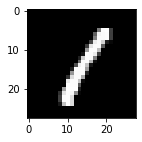

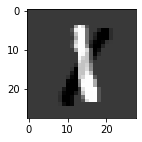

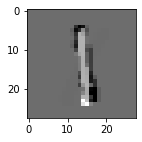

In [77]:
# the "singular image" of digit i
plot_image(U[1][0].reshape(28, 28))
plot_image(U[1][1].reshape(28, 28))
plot_image(U[1][2].reshape(28, 28))